<a href="https://colab.research.google.com/github/VarunKoduru/Machine-Learning/blob/main/ML_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
n = np.arange(11)
n2 = n[n%2 != 0]
print(n2)

[1 3 5 7 9]


In [ ]:
n = np.arange(9).reshape(3,3)
normal = (n-np.mean(n))/np.std(n)
print(normal)

[[-1.54919334 -1.161895   -0.77459667]
 [-0.38729833  0.          0.38729833]
 [ 0.77459667  1.161895    1.54919334]]


In [ ]:
print(n)
print(np.trace(n))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
12


In [ ]:
a = np.array([1,2,0,0,4,0])
print(np.nonzero(a))

(array([0, 1, 4]),)


In [ ]:
n = np.eye(3,3)
print(n)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [12]:
# Date: 25th July 2025
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X.shape
# print(X[:5])
col = iris.feature_names
print(iris.data.shape)
print(iris.keys())
print(iris.DESCR)
print(col)


(150, 4)
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ====

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris



# Load dataset from scikit-learn
iris = load_iris()

# Convert to DataFrame and add Species column
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Add Id column (1-150)
df.insert(0, 'Id', range(1, len(df) + 1))

In [18]:
from sklearn.datasets import load_iris

iris = load_iris()
print("Keys:", iris.keys())
print("Number of rows & columns:", iris.data.shape)
print("Feature Names:", iris.feature_names)
print("Description:\n", iris.DESCR[:500])

Keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Number of rows & columns: (150, 4)
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Description:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= =====


In [19]:
print("Number of observations:", len(df))
print("Missing values per column:\n", df.isnull().sum())#3)

Number of observations: 150
Missing values per column:
 Id                   0
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64


In [20]:
print(df.describe())

               Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
count  150.000000         150.000000        150.000000         150.000000   
mean    75.500000           5.843333          3.057333           3.758000   
std     43.445368           0.828066          0.435866           1.765298   
min      1.000000           4.300000          2.000000           1.000000   
25%     38.250000           5.100000          2.800000           1.600000   
50%     75.500000           5.800000          3.000000           4.350000   
75%    112.750000           6.400000          3.300000           5.100000   
max    150.000000           7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [21]:
for species in df['Species'].unique():
    print(f"\nObservations for {species}:")
    print(df[df['Species'] == species].head(3))


Observations for setosa:
   Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0   1                5.1               3.5                1.4   
1   2                4.9               3.0                1.4   
2   3                4.7               3.2                1.3   

   petal width (cm) Species  
0               0.2  setosa  
1               0.2  setosa  
2               0.2  setosa  

Observations for versicolor:
    Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
50  51                7.0               3.2                4.7   
51  52                6.4               3.2                4.5   
52  53                6.9               3.1                4.9   

    petal width (cm)     Species  
50               1.4  versicolor  
51               1.5  versicolor  
52               1.5  versicolor  

Observations for virginica:
      Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
100  101                6.3               3.3                

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


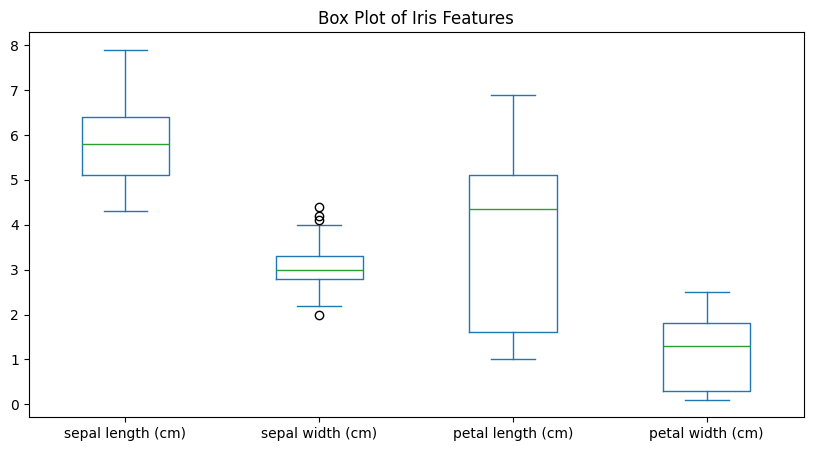

In [22]:
df_no_id = df.drop(columns='Id')
print(df_no_id.head())
df_no_id.drop(columns='Species').plot(kind='box', figsize=(10,5))
plt.title("Box Plot of Iris Features")
plt.show()

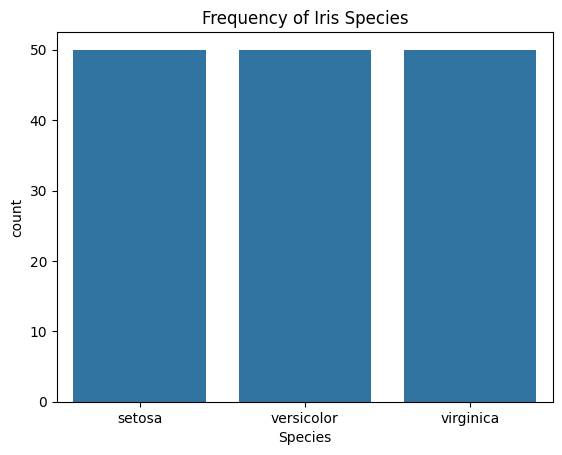

In [23]:
sns.countplot(x='Species', data=df)
plt.title("Frequency of Iris Species")
plt.show()

In [25]:
X = df.iloc[:, 0:4]
y = df['Species']
print("Attributes (X):\n", X.head())
print("\nLabels (y):\n", y.head())

Attributes (X):
    Id  sepal length (cm)  sepal width (cm)  petal length (cm)
0   1                5.1               3.5                1.4
1   2                4.9               3.0                1.4
2   3                4.7               3.2                1.3
3   4                4.6               3.1                1.5
4   5                5.0               3.6                1.4

Labels (y):
 0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [27]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("\n=== Training Data (first 5) ===\n", X_train.head())
print("\n=== Test Data (first 5) ===\n", X_test.head())


X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)

=== Training Data (first 5) ===
       Id  sepal length (cm)  sepal width (cm)  petal length (cm)
81    82                5.5               2.4                3.7
133  134                6.3               2.8                5.1
137  138                6.4               3.1                5.5
75    76                6.6               3.0                4.4
109  110                7.2               3.6                6.1

=== Test Data (first 5) ===
       Id  sepal length (cm)  sepal width (cm)  petal length (cm)
73    74                6.1               2.8                4.7
18    19                5.7               3.8                1.7
118  119                7.7               2.6                6.9
78    79                6.0               2.9                4.5
76    77                6.8               2.8                4.8


In [28]:
df['Species_Code'] = df['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
print(df[['Species', 'Species_Code']].head())
X = df.iloc[:, 0:4]
y = df['Species_Code']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("\n=== Training Data (first 5) ===\n", X_train.head())
print("\n=== Test Data (first 5) ===\n", X_test.head())

  Species Species_Code
0  setosa            0
1  setosa            0
2  setosa            0
3  setosa            0
4  setosa            0
Train shape: (120, 4) (120,)
Test shape: (30, 4) (30,)

=== Training Data (first 5) ===
     Id  sepal length (cm)  sepal width (cm)  petal length (cm)
22  23                4.6               3.6                1.0
15  16                5.7               4.4                1.5
65  66                6.7               3.1                4.4
11  12                4.8               3.4                1.6
42  43                4.4               3.2                1.3

=== Test Data (first 5) ===
       Id  sepal length (cm)  sepal width (cm)  petal length (cm)
73    74                6.1               2.8                4.7
18    19                5.7               3.8                1.7
118  119                7.7               2.6                6.9
78    79                6.0               2.9                4.5
76    77                6.8             

In [69]:
#Week 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diab = pd.read_csv('/content/diabetes.csv')
#print(diab)

X = diab.drop(columns='Outcome')
y = diab["Outcome"]
print(X)
print(y)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [67]:
X_train,X_test,y_train,y_test = train_test_split(diab.drop(columns="Outcome"),diab["Outcome"],test_size=0.4,random_state=69)
constant_features = [features for features in X_train.columns if X_train[features].std() == 0]
len(constant_features)

0